In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

from google.colab import files
uploaded = files.upload()

Saving crypto_data.csv to crypto_data (8).csv


In [194]:
import io
crypto_df= pd.read_csv(io.BytesIO(uploaded['crypto_data.csv']))

In [195]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


* Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.

* Remove all rows that have at least one null value.

* Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

* In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.

* Your next step in data preparation is to convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?

* Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.


In [196]:
#Discarding all cryptocurrencies that are not being traded
crypto_df = crypto_df.drop(crypto_df.index[crypto_df['IsTrading'] == 'False'])
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [197]:
#drop the IsTrading column for the dataFrame
crypto_df = crypto_df. drop(['IsTrading'], axis = 1)

In [198]:
# Remove all rows that have at least one null value.
crypto_df = crypto_df.dropna(how='any',axis=0)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [199]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
mined_crypto_df = crypto_df['TotalCoinsMined'] > 0
filtered_crypto_df = crypto_df[mined_crypto_df]
filtered_crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [200]:
# Deleting coinName from dataFrame
filtered_crypto_df = filtered_crypto_df.drop(['CoinName'], axis = 1)
filtered_crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000
1247,XBC,Scrypt,PoS,1.283270e+05,1000000


In [201]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data
import numpy as np
slices = np.r_[slice(0), slice(1,3), slice(4)]
excluded = [0,3,4]

df_dummies = pd.concat([filtered_crypto_df.iloc[:, excluded], pd.get_dummies(data=filtered_crypto_df.iloc[:, slices].astype(object))], names=['Unnamed: 0'], axis=1)
df_dummies


,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,...,TotalCoinsMined_10996318099.0,TotalCoinsMined_11086825523.3769,TotalCoinsMined_11406219141.0,TotalCoinsMined_12539015186.821999,TotalCoinsMined_14491014421.0,TotalCoinsMined_15318887081.0146,TotalCoinsMined_15929530669.1206,TotalCoinsMined_17209923728.3266,TotalCoinsMined_17939725045.334,TotalCoinsMined_18773857500.0,TotalCoinsMined_19281821413.4924,TotalCoinsMined_19577787259.0,TotalCoinsMined_21293925445.4969,TotalCoinsMined_21739971929.0,TotalCoinsMined_22801882871.0,TotalCoinsMined_25000000000.0,TotalCoinsMined_25927070538.0,TotalCoinsMined_28399150208.0,TotalCoinsMined_29279424622.5027,TotalCoinsMined_29315567169.0888,TotalCoinsMined_29583989322.9213,TotalCoinsMined_30089671530.5228,TotalCoinsMined_30825710000.0296,TotalCoinsMined_33098296530.0,TotalCoinsMined_33813143821.8337,TotalCoinsMined_36971236046.8073,TotalCoinsMined_39999997299.8568,TotalCoinsMined_40659020000.0,TotalCoinsMined_41294520017.0,TotalCoinsMined_48459472454.0,TotalCoinsMined_53139835213.77,TotalCoinsMined_55454734800.0,TotalCoinsMined_77872059787.8998,TotalCoinsMined_90595753018.6314,TotalCoinsMined_92192822723.0,TotalCoinsMined_99553110528.8022,TotalCoinsMined_143006669741.68698,TotalCoinsMined_163055097500.0,TotalCoinsMined_184066828814.0,TotalCoinsMined_989988713439.649
0,42,4.199995e+01,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1247,XBC,1.283270e+05,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...

In [202]:
#setting the Unnamed: 0 as the index

df_dummies = df_dummies.set_index('Unnamed: 0')

After converting the remaining text values to variables using get_dummies, the number of columns has dramatically increased from 5 to 1340

In [203]:
# Standarize data with StandarScaler
crypto_scaled = StandardScaler().fit_transform(df_dummies)
print(crypto_scaled)

[[-0.11450078 -0.15072489 -0.04166667 ... -0.04166667 -0.04166667
  -0.04166667]
 [-0.09041991 -0.14255828 -0.04166667 ... -0.04166667 -0.04166667
  -0.04166667]
 [ 0.55369883  4.67185916 -0.04166667 ... -0.04166667 -0.04166667
  -0.04166667]
 ...
 [-0.11433426 -0.15040252 -0.04166667 ... -0.04166667 -0.04166667
  -0.04166667]
 [-0.11449785 -0.15070954 -0.04166667 ... -0.04166667 -0.04166667
  -0.04166667]
 [-0.11401032 -0.14918981 -0.04166667 ... -0.04166667 -0.04166667
  -0.04166667]]


In [204]:
# Applying PCA to reduce dimensions preserving 80% of the explained variance.
from sklearn.decomposition import PCA
pca = PCA(n_components=0.80)
crypto_pca = pca.fit_transform(crypto_scaled)


In [205]:
crypto_pca

array([[-9.43260458e-01,  2.00350465e+00, -6.99012567e-01, ...,
        -1.68579225e-16,  2.55048334e-16,  3.45239802e-17],
       [-9.30590198e-01,  2.00381545e+00, -6.99792134e-01, ...,
         4.24321525e-02,  1.08485374e-01, -2.63484632e-01],
       [ 1.01489285e+00,  3.16306035e+00, -8.74831931e-01, ...,
        -1.03591300e+00,  4.16506536e-01,  2.02010801e-01],
       ...,
       [ 1.36646935e-01, -3.62086994e+00,  5.30773287e-01, ...,
        -7.99895756e-02,  3.67845103e-01, -4.59732560e+00],
       [-4.57158336e-01,  1.35839794e+00, -3.39123115e-01, ...,
         1.20121589e-01,  6.13527873e-01,  2.67568080e+00],
       [-9.42551634e-01,  2.00348389e+00, -6.99052516e-01, ...,
         5.89828012e-01, -8.91421705e-01,  1.31481402e+00]])

In [206]:
#converting the resulting array into a dataframe
crypto_converted_df = pd.DataFrame(crypto_pca)
crypto_converted_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437
0,-0.943260,2.003505,-0.699013,0.000991,-1.494815e-12,-0.026677,-2.111854,-0.644367,0.135397,0.175271,0.286141,-0.804066,0.196990,-1.077094,1.545823,0.288094,0.142294,0.013999,0.111541,0.034214,-0.058170,0.000499,-0.027231,-0.021118,-0.002436,-0.000061,0.001856,-0.010400,-0.003616,-0.000160,7.405134e-17,1.475634e-06,-0.006164,-0.004650,0.002903,0.002406,0.005556,0.013348,6.218537e-17,7.200661e-17,...,3.060559e-16,7.530413e-17,2.042753e-16,-8.114759e-17,7.010362e-17,-1.195696e-16,-1.673214e-16,2.206349e-16,-1.542079e-16,-2.669666e-16,-1.231850e-16,1.043783e-16,1.512229e-16,-2.523548e-16,2.291142e-17,1.301023e-16,4.429982e-16,-2.504930e-18,-1.879849e-16,2.753826e-17,-3.220020e-16,3.610559e-16,-2.245542e-16,-2.518626e-16,1.495867e-16,2.202592e-16,-4.096833e-16,1.924095e-16,-1.162519e-16,-1.017262e-17,-2.224249e-17,5.354302e-17,1.215795e-16,-1.793225e-16,-1.165622e-16,-1.229207e-16,3.425619e-16,-1.685792e-16,2.550483e-16,3.452398e-17
1,-0.930590,2.003815,-0.699792,0.000984,-1.480621e-12,-0.029334,-2.115598,-0.645174,0.133029,0.173682,0.286899,-0.805448,0.210588,-1.074237,1.544860,0.288224,0.142642,0.014625,0.111583,0.033075,-0.058121,0.000369,-0.027263,-0.021080,-0.002568,-0.000075,0.001883,-0.010401,-0.003557,-0.000236,1.162178e-14,1.212130e-06,-0.006143,-0.004629,0.002908,0.002453,0.005307,0.013425,-6.991467e-16,1.292315e-14,...,9.776173e-01,1.322316e-01,2.044958e-01,-1.744821e-02,-5.509098e-01,-9.672927e-01,7.007122e-01,-6.778785e-03,-1.033528e+00,-1.628262e+00,-2.736699e-01,2.980155e-01,-2.372855e-01,1.183393e+00,-6.495725e-01,-4.846885e-01,3.679745e-01,8.838225e-01,-4.557571e-01,7.257697e-01,-2.359579e+00,-4.776088e-01,-1.533251e+00,-1.026332e+00,9.777965e-02,2.315432e+00,-1.761072e+00,7.545770e-01,1.159305e+00,-7.966812e-01,2.405759e+00,-2.978833e-01,7.809825e-01,-3.110112e+00,-8.782585e-01,-7.067939e-01,-1.348494e+00,4.243215e-02,1.084854e-01,-2.634846e-01
2,1.014893,3.163060,-0.874832,0.003214,-4.522417e-12,-0.443189,-2.160439,-0.597953,-0.147840,-0.103922,-0.667498,-0.183972,2.216243,2.008229,-1.207391,-2.985551,-0.371500,-2.573134,-0.738447,2.541884,9.220802,0.682330,-1.682018,2.698582,0.008449,-0.006051,0.210525,0.274460,0.071746,0.000962,-1.222094e-13,1.875214e-05,-0.149689,-0.024169,-0.140251,-0.037955,-0.245334,-0.424604,2.544624e-13,-3.211677e-12,...,-1.969930e+00,2.048140e-01,7.646337e-02,6.518545e-01,4.364731e-03,1.754629e+00,1.431259e+00,-2.150853e-01,-3.645953e-02,7.622097e-01,-4.269649e-01,-8.592577e-01,1.084017e-01,-1.019999e+00,1.290689e+00,-1.137360e+00,1.097844e+00,1.324212e+00,-8.488867e-01,-6.763551e-01,-7.326079e-01,-1.208060e+00,-1.001510e+00,-1.599707e+00,-5.658498e-01,4.644632e-01,-1.428812e+00,8.702150e-01,1.645520e+00,-1.396804e+00,-1.246471e+00,-6.514390e-01,-4.613967e-01,-2.666399e+00,-4.017025e-01,-3.135577e+00,-1.257637e+00,-1.035913e+00,4.165065e-01,2.020108e-01
3,0.089755,-2.338159,0.239321,-0.000832,1.171977e-12,0.066708,0.107544,0.145837,0.178095,0.036626,-0.430586,0.121501,-0.623317,0.213138,-1.269826,-2.195999,-0.550152,5.935959,0.161303,0.743255,0.055942,0.291814,-0.076282,0.285507,0.045721,-0.000347,0.022676,0.045700,-0.046901,-0.002071,2.387076e-13,-2.898880e-05,-0.003950,-0.067410,-0.018429,0.052802,-0.017082,-0.060095,-1.270213e-13,1.983768e-12,...,-2.418652e+00,-1.716298e+00,2.095141e-01,-9.359277e-01,-2.830922e+00,3.540061e+00,3.475510e-01,-2.232317e+00,2.853883e+00,1.686474e+00,-1.188083e+00,-4.363676e-01,4.865090e-01,4.863287e-01,-1.439723e+00,4.121849e-02,1.824719e+00,-9.638121e-01,3.408901e-01,-1.959634e+00,1.285670e+00,1.918842e+00,1.149867e+00,1.444739e+00,1.372079e+00,1.029072e+00,-7.285237e-01,6.392415e-01,3.668756e+00,9.805770e-01,1.599616e-01,-1.874250e+00,-1.611680e+00,8.943812e-01,1.255274e+00,-1.2298

The number of rows has reduced from 1340 to 438

In [213]:
#now reduce the data setset dimension with T_SNE and visually inspect the data - run TSNE on the principal components the output of the PCA transformation

from sklearn.manifold import TSNE

In [214]:
tsne = TSNE(learning_rate=100)

In [215]:
tsne_features = tsne.fit_transform(crypto_converted_df)

In [216]:
tsne_features.shape

(577, 2)

The dataset has 2 columsn

In [217]:
#preparing to visualize the results
#first column of the transformed features
crypto_converted_df['x'] = tsne_features[:,0]
#second column of the transformed features
crypto_converted_df['y'] = tsne_features[:,1]


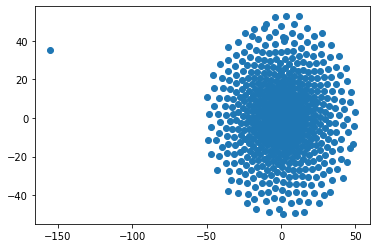

In [218]:
#Visualizing the clusters
import matplotlib.pyplot as plt
plt.scatter(crypto_converted_df['x'], crypto_converted_df['y'])
plt.show()

The seems to be only one distinct cluster with an outlier at this point

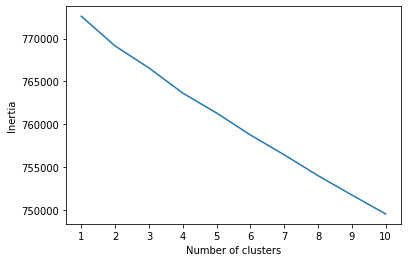

In [220]:
# cluster analysis with K-means
from sklearn.cluster import KMeans
inertia = []
k = list(range(1,11))
for i in k:
  km = KMeans(n_clusters = i, random_state = 0)
  km.fit(crypto_scaled)
  inertia.append(km.inertia_)
  #define dataframe to plot the Elbow Curve using hvplot
elbow_data ={'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

based on the analysis it does not look like cryptocurrencies can be clustered there is no obvious best 'k' value as the line is rather with no curve or elbow